## Energy Analysis Requirement
Domestication of electricity as a commodity has helped people make use of it in innovative ways. It has made the lives of people easy. Hence an analysis of energy is always important.

Here **NTPC** has provided a major role of power production in India since 1975.



---







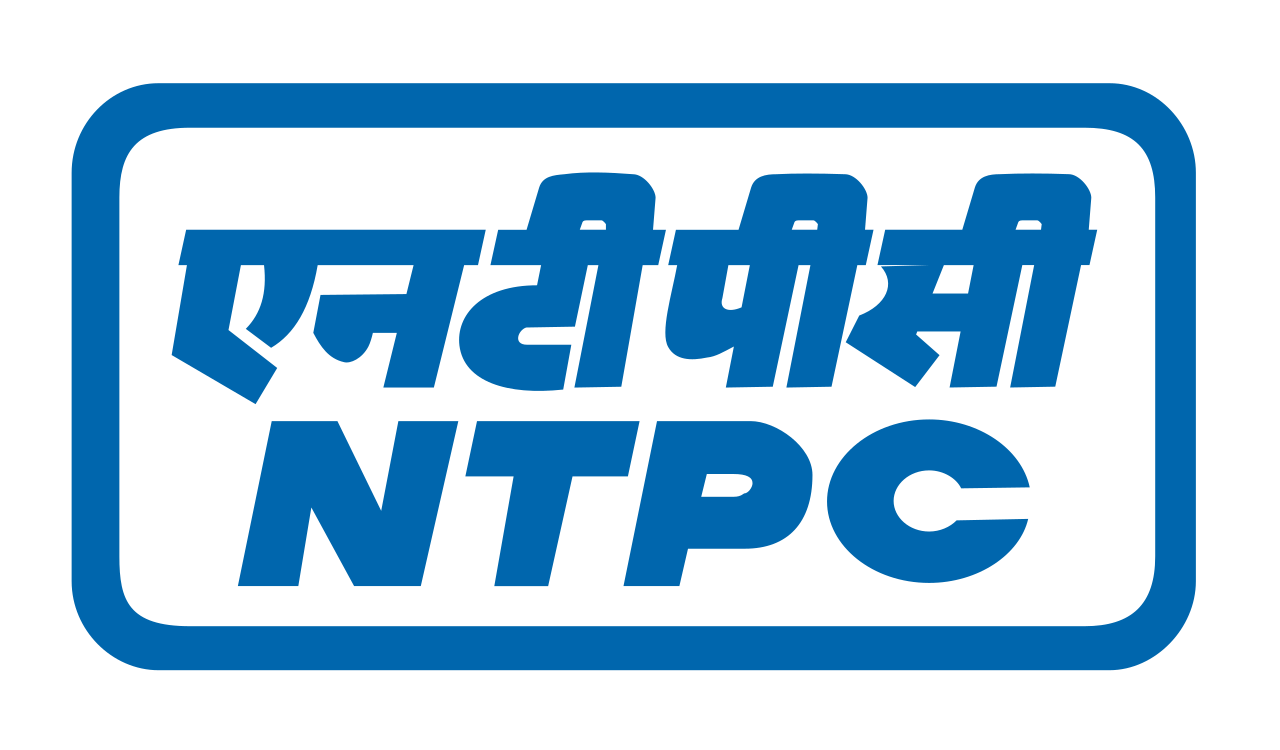



---


# Power Generation Requirement Analysis for NTPC
NTPC has always have been considered above average in terms of power production in India. It accounts for 25% approximately of India's total power generation. This notebook will give an comprehensive analyis of how much more power generation does NTPC requires to keep up this performance in the future as the demand for power supply rises due to various factors which also have been analyzed here.



---





# Drive And Imports

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import pearsonr
%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error



---



# Data Analysis

## Exploratory Data Analysis(EDA)

Let us consider multiple possible factors : **Population Growth**, **Electricity Access(in percentage of population** , **per Capita Electricity consumption(pCEC in KWH)** and **GDP** for this case study that might be responsible for the rise in demand of power in India.

**Note**: All the data-sets that have been utilized are taken from https://data.worldbank.org/country/IN and https://ourworldindata.org


In [ ]:
# data paths
absolute='/content/gdrive/MyDrive/Notebook_data/power_consumption/proj_data2/absolute_power_consumption(BU).csv'
access='/content/gdrive/MyDrive/Notebook_data/power_consumption/proj_data2/electricity_access_in_percentage.csv'
pop_grow='/content/gdrive/MyDrive/Notebook_data/power_consumption/proj_data2/population_growth.csv'
gdp='/content/gdrive/MyDrive/Notebook_data/power_consumption/proj_data2/GDP.csv'
per_capita='/content/gdrive/MyDrive/Notebook_data/power_consumption/proj_data2/per_capita_electric_power_consumption(pCEC).csv'
combined='/content/gdrive/MyDrive/Notebook_data/power_consumption/proj_data2/combined.csv'

Since the data values are too high for some data sets and the scaling also varies , hence it would be wiser to use min-max normalization to normalize the data so that certain factors with large values are automatically not considered as important variables , hence making the data analysis much fair and accurate.

In [ ]:
# min-max normalization
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

### Absolute Power Consumption


In [ ]:
df_absolute = pd.read_csv(absolute)
# min-max scaling 
df_absolute['energy_consumption(TWh)'] = min_max_scaling(df_absolute['energy_consumption(TWh)'])
df_absolute.head(2)

,Year,energy_consumption(TWh)
0,1971,0.00000
1,1972,0.00592


#### Plot for Absolute power consumption (in BU)

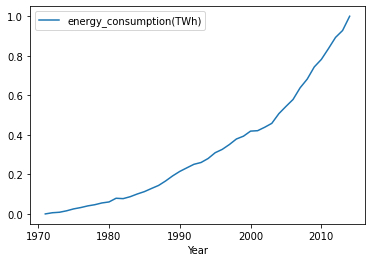

In [ ]:
df_absolute.plot(kind = 'line', x = 'Year', y = 'energy_consumption(TWh)')

Please note that the values are normalized here.

### Per-Capita Energy Consumption

In [ ]:
df_per_capita = pd.read_csv(per_capita)
# min-max normalize
df_per_capita['per_capita_electric_consumption'] = min_max_scaling(df_per_capita['per_capita_electric_consumption'])
df_per_capita.head(2)

,Year,per_capita_electric_consumption
0,1971,0.000000
1,1972,0.003583


#### Plot for Per-capita Energy consumption

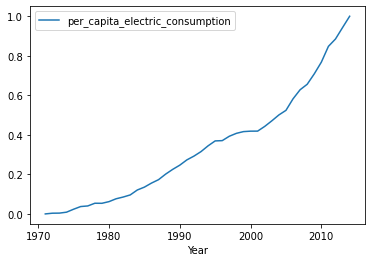

In [ ]:
df_per_capita.plot(kind = 'line', x = 'Year', y = 'per_capita_electric_consumption')

### Electricity-Acesss

In [ ]:
df_access = pd.read_csv(access)
# min max normalize
df_access['electricity_access'] = min_max_scaling(df_access['electricity_access'])
df_access.head(2)

,Year,electricity_access
0,1971,0.000000
1,1972,0.018191


#### Plot for Electricity Access

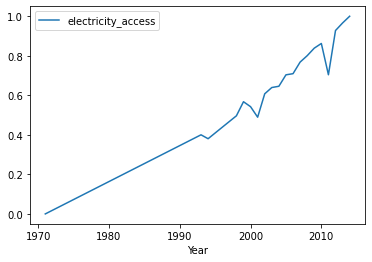

In [ ]:
df_access.plot(kind = 'line', x = 'Year', y = 'electricity_access')

### Population Growth

In [ ]:
df_pop_grow = pd.read_csv(pop_grow)
# min-max normalize
df_pop_grow['population_growth'] = min_max_scaling(df_pop_grow['population_growth'])
df_pop_grow.head(2)

,Year,population_growth
0,1971,0.937612
1,1972,0.974105


#### Plot for Population Growth

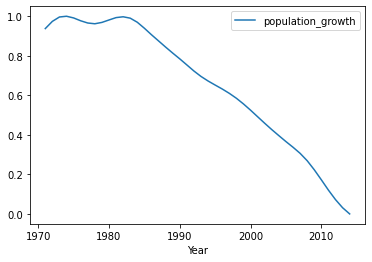

In [ ]:
df_pop_grow.plot(kind = 'line', x = 'Year', y = 'population_growth')

### GDP

In [ ]:
df_gdp = pd.read_csv(gdp)
# min-maxing
df_gdp['GDP'] = min_max_scaling(df_gdp['GDP'])
df_gdp.head(2)

,Year,GDP
0,1971,0.000000
1,1972,0.002085


#### Plot for GDP

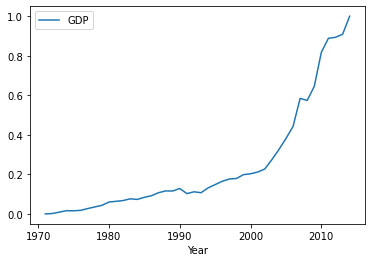

In [ ]:
df_gdp.plot(kind = 'line', x = 'Year', y = 'GDP')

## Co-relation Analysis

Now we analyze if the factors are interdependent or not. This can be done by two ways:

1.   Cosine Similarity
2.   Pearson's Co-relation Co-efficent



### Cosine Similarity

In [ ]:
#cosine function
def cosine(A , B):
    cos = np.dot(A,B)/(norm(A)*norm(B))
    return cos

#### Similarity between **Absolute Energy Consumption** and **Electricity Access** 

In [ ]:
print("Cosine Similarity: ",cosine(df_access['electricity_access'].to_numpy(),df_absolute['energy_consumption(TWh)'].to_numpy()))

Cosine Similarity:  0.9832937014361404


Since the value is approximately 1 hence it is an important factor for rise in electricity demand.

#### Similarity between **Absolute Energy Consumption** and **Population Growth**

In [ ]:
# rel between pop growth and consupmtion
print("Cosine Similarity: ",cosine(df_pop_grow['population_growth'].to_numpy(),df_absolute['energy_consumption(TWh)'].to_numpy()))

Cosine Similarity:  0.4008273819852284


Since the value is *not* closer to 1 hence it is ***probably not related factor*** for rise in electricity demand.

#### Similarity between **Absolute Energy Consumption** and **GDP** 

In [ ]:
# rel btw gdp and consupmtion
print("Cosine Similarity: ",cosine(df_gdp['GDP'].to_numpy(),df_absolute['energy_consumption(TWh)'].to_numpy()))

Cosine Similarity:  0.9717568270494809


Since the value is  closer to 1 hence it is ***probably  related factor*** for rise in electricity demand.

#### Similarity between **Absolute Energy Consumption** and **pCEC** 

In [ ]:
print("Cosine Similarity: ",cosine(df_per_capita['per_capita_electric_consumption'].to_numpy(),df_absolute['energy_consumption(TWh)'].to_numpy()))

Cosine Similarity:  0.9983722089415492


Hence it is related factor as well.

### Pearson's Co-relation

#### For **GDP** and **Absolute Energy Consumption**

In [ ]:
g = df_gdp['GDP'].to_numpy()
abs = df_absolute['energy_consumption(TWh)'].to_numpy()
 
# Apply the pearsonr()
corr, _ = pearsonr(g, abs)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.960


*Positively corelated*

#### For **Population Growth** and **Energy Consumption**

In [ ]:
grow = df_pop_grow['population_growth'].to_numpy()
# Apply the pearsonr()
corrr, _ = pearsonr(grow, abs)
print('Pearsons correlation: %.3f' % corrr)

Pearsons correlation: -0.992


*Negatively corelated*

#### For **Electricity Access** and **Energy Consumption**

In [ ]:
a = df_access['electricity_access'].to_numpy()
# Apply the pearsonr()
corrr, _ = pearsonr(a, abs)
print('Pearsons correlation: %.3f' % corrr)

Pearsons correlation: 0.979


*Positively corelated*

#### For **Per-capita Energy Consumption** and **Absolute Energy Consumption**

In [ ]:
pc = df_per_capita['per_capita_electric_consumption'].to_numpy()
# Apply the pearsonr()
corrr, _ = pearsonr(pc, abs)
print('Pearsons correlation: %.3f' % corrr)

Pearsons correlation: 0.997


*Positively corelated*

 ### Conclusions


GDP, Electrical Access , Per Capita Consumption are highly related. 





---



## Linear Regression Analysis

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data, then estimate the value of X (dependent variable) from Y (independent variable).

We are going to use linear regression to predict the various factors , for that we need to train the seperate models and predict the future values of it.

**Population Growth**

     Year  population_growth
0  2022.0           1.096489
1  2023.0           1.068371
2  2024.0           1.040254
3  2025.0           1.012136
4  2026.0           0.984019
5  2027.0           0.955902
6  2028.0           0.927784
7  2029.0           0.899667
8  2030.0           0.871549


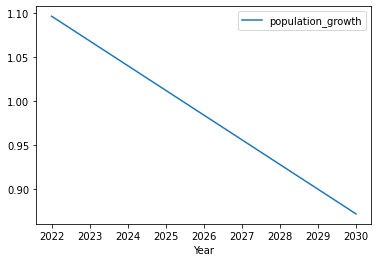

In [ ]:
df_pop_grow2 = pd.read_csv(pop_grow)
# input-output split
X=df_pop_grow2['Year']
y=df_pop_grow2['population_growth']

# train the model
# Linear Regression

pop_grow_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
# model0  = LinearRegression(normalize=True)
pop_grow_model.fit(X.to_numpy().reshape(-1,1), y)

# prediction array
X_pred=np.array([2022,2023,2024,2025,2026,2027,2028,2029,2030])
y_pred=pop_grow_model.predict(X_pred.reshape(-1, 1))

# making a new data frame 
datas = np.vstack((X_pred, y_pred)).T

# creating a list of index names
index_values = [0,1,2,3,4,5,6,7,8]
   
# creating a list of column names
column_values = ['Year', 'population_growth']
  
df_pred_pop_growth = pd.DataFrame(data = datas, 
                  index = index_values, 
                  columns = column_values)
print(df_pred_pop_growth.head(9))

df_pred_pop_growth.plot(kind = 'line', x = 'Year', y = 'population_growth')
  

Electricity Access

     Year  electricity_access
0  2022.0           87.097680
1  2023.0           88.284165
2  2024.0           89.470649
3  2025.0           90.657134
4  2026.0           91.843619
5  2027.0           93.030104
6  2028.0           94.216589
7  2029.0           95.403074
8  2030.0           96.589559


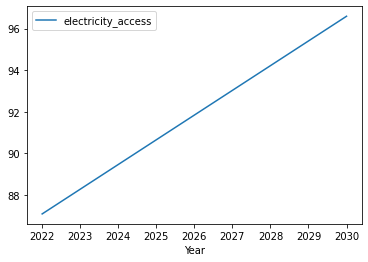

In [ ]:
df_access2 = pd.read_csv(access)
# input-output split
X=df_access2['Year']
y=df_access2['electricity_access']

# train the model
# Linear Regression

access_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
# model0  = LinearRegression(normalize=True)
access_model.fit(X.to_numpy().reshape(-1,1), y)

# prediction array
X_pred=np.array([2022,2023,2024,2025,2026,2027,2028,2029,2030])
y_pred=access_model.predict(X_pred.reshape(-1, 1))

# making a new data frame 
datas = np.vstack((X_pred, y_pred)).T

# creating a list of index names
index_values = [0,1,2,3,4,5,6,7,8]
   
# creating a list of column names
column_values = ['Year', 'electricity_access']
  
df_pred_access = pd.DataFrame(data = datas, 
                  index = index_values, 
                  columns = column_values)
print(df_pred_access.head(9))

df_pred_access.plot(kind = 'line', x = 'Year', y = 'electricity_access')
  

**Per-Capita-Energy Consumption**

     Year  per_capita_electric_consumption
0  2022.0                       775.880197
1  2023.0                       790.819101
2  2024.0                       805.758005
3  2025.0                       820.696910
4  2026.0                       835.635814
5  2027.0                       850.574719
6  2028.0                       865.513623
7  2029.0                       880.452527
8  2030.0                       895.391432


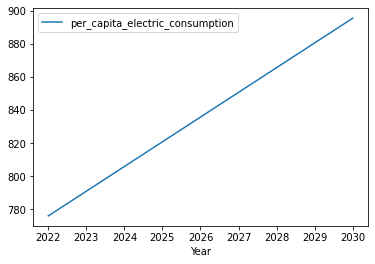

In [ ]:
df_per_capita2 = pd.read_csv(per_capita)
# input-output split
X=df_per_capita2['Year']
y=df_per_capita2['per_capita_electric_consumption']

# train the model
# Linear Regression

per_capita_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
# model0  = LinearRegression(normalize=True)
per_capita_model.fit(X.to_numpy().reshape(-1,1), y)

# prediction array
X_pred=np.array([2022,2023,2024,2025,2026,2027,2028,2029,2030])
y_pred=per_capita_model.predict(X_pred.reshape(-1, 1))

# making a new data frame 
datas = np.vstack((X_pred, y_pred)).T

# creating a list of index names
index_values = [0,1,2,3,4,5,6,7,8]
   
# creating a list of column names
column_values = ['Year', 'per_capita_electric_consumption']
  
df_pred_per_capita = pd.DataFrame(data = datas, 
                  index = index_values, 
                  columns = column_values)
print(df_pred_per_capita.head(9))

df_pred_per_capita.plot(kind = 'line', x = 'Year', y = 'per_capita_electric_consumption')
  

**GDP**

     Year           GDP
0  2022.0  1.652768e+12
1  2023.0  1.690019e+12
2  2024.0  1.727271e+12
3  2025.0  1.764522e+12
4  2026.0  1.801774e+12
5  2027.0  1.839025e+12
6  2028.0  1.876277e+12
7  2029.0  1.913528e+12
8  2030.0  1.950780e+12


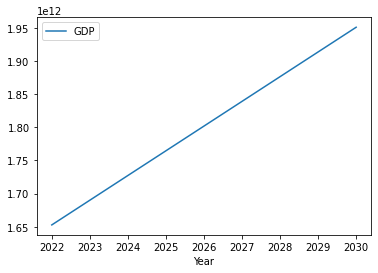

In [ ]:
df_gdp2 = pd.read_csv(gdp)
# input-output split
X=df_gdp2['Year']
y=df_gdp2['GDP']

# train the model
# Linear Regression

gdp_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
# model0  = LinearRegression(normalize=True)
gdp_model.fit(X.to_numpy().reshape(-1,1), y)

# prediction array
X_pred=np.array([2022,2023,2024,2025,2026,2027,2028,2029,2030])
y_pred=gdp_model.predict(X_pred.reshape(-1, 1))

# making a new data frame 
datas = np.vstack((X_pred, y_pred)).T

# creating a list of index names
index_values = [0,1,2,3,4,5,6,7,8]
   
# creating a list of column names
column_values = ['Year', 'GDP']
  
df_pred_gdp = pd.DataFrame(data = datas, 
                  index = index_values, 
                  columns = column_values)
print(df_pred_gdp.head(9))

df_pred_gdp.plot(kind = 'line', x = 'Year', y = 'GDP')
  

In [ ]:
df_pred_pop_growth['GDP']=df_pred_gdp['GDP']
df_pred_pop_growth['per_capita_electric_consumption']=df_pred_per_capita['per_capita_electric_consumption']
df_pred_pop_growth['electricity_access']=df_pred_access['electricity_access']
df_combined_pred=df_pred_pop_growth
df_combined_pred.head(9)

,Year,population_growth,GDP,per_capita_electric_consumption,electricity_access
0,2022.0,1.096489,1.652768e+12,775.880197,87.097680
1,2023.0,1.068371,1.690019e+12,790.819101,88.284165
2,2024.0,1.040254,1.727271e+12,805.758005,89.470649
3,2025.0,1.012136,1.764522e+12,820.696910,90.657134
4,2026.0,0.984019,1.801774e+12,835.635814,91.843619
5,2027.0,0.955902,1.839025e+12,850.574719,93.030104
6,2028.0,0.927784,1.876277e+12,865.513623,94.216589
7,2029.0,0.899667,1.913528e+12,880.452527,95.403074
8,2030.0,0.871549,1.950780e+12,895.391432,96.589559


This is the predicted values to be used for prediction of our absolute power consumption model.



---





---



---



---



# Projection of NTPC Requirements

NTPC annually contributes approximately 25% of total power generated in India. To maintain a similar performance in the future the following projection has been performed to estimate how much capacity of total energy needed to be produced by NTPC in the upcoming years.   

The below graph denotes the current performance of NTPC compared to overall India.

**Note:** The data has been taken from https://www.ntpc.co.in/en/power-generation/performance-statistics

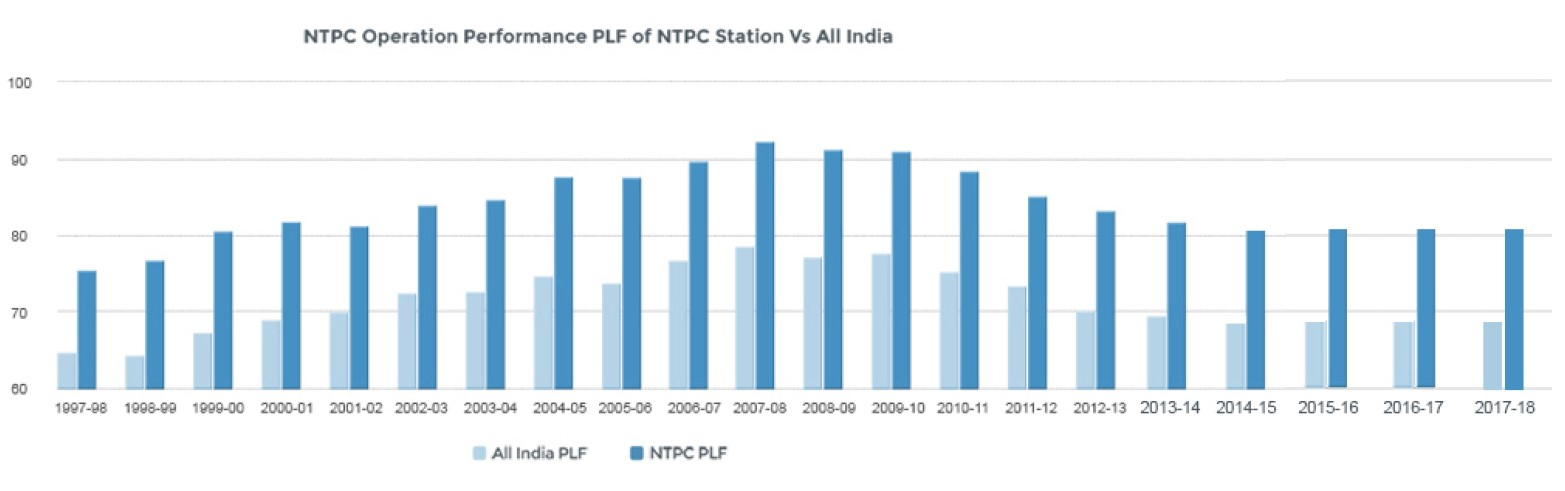

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Notebook_data/power_consumption/proj_data2/combined.csv")
print("Print the dataframe-------------")
print(df.head())
print("Print describe-----------------")
print(df.describe())
print("Print info---------------------")
print(df.info())


# check for null values
print("Printing if there are any null values-------------")
print(df.isnull().sum())



Print the dataframe-------------
   Year  energy_consumption(TWh)  population_growth           GDP  \
0  1971                 794.3863           2.257900  6.735099e+10   
1  1972                 835.8586           2.301189  7.146319e+10   
2  1973                 853.3237           2.327408  8.551527e+10   
3  1974                 903.9876           2.331906  9.952590e+10   
4  1975                 972.0112           2.321760  9.847280e+10   

   per_capita_electric_consumption  electricity_access  
0                        97.772718                28.9  
1                       100.305074                29.9  
2                       100.632154                30.9  
3                       103.992658                31.9  
4                       114.558928                32.9  
Print describe-----------------
              Year  energy_consumption(TWh)  population_growth           GDP  \
count    44.000000                44.000000          44.000000  4.400000e+01   
mean   1992.500000

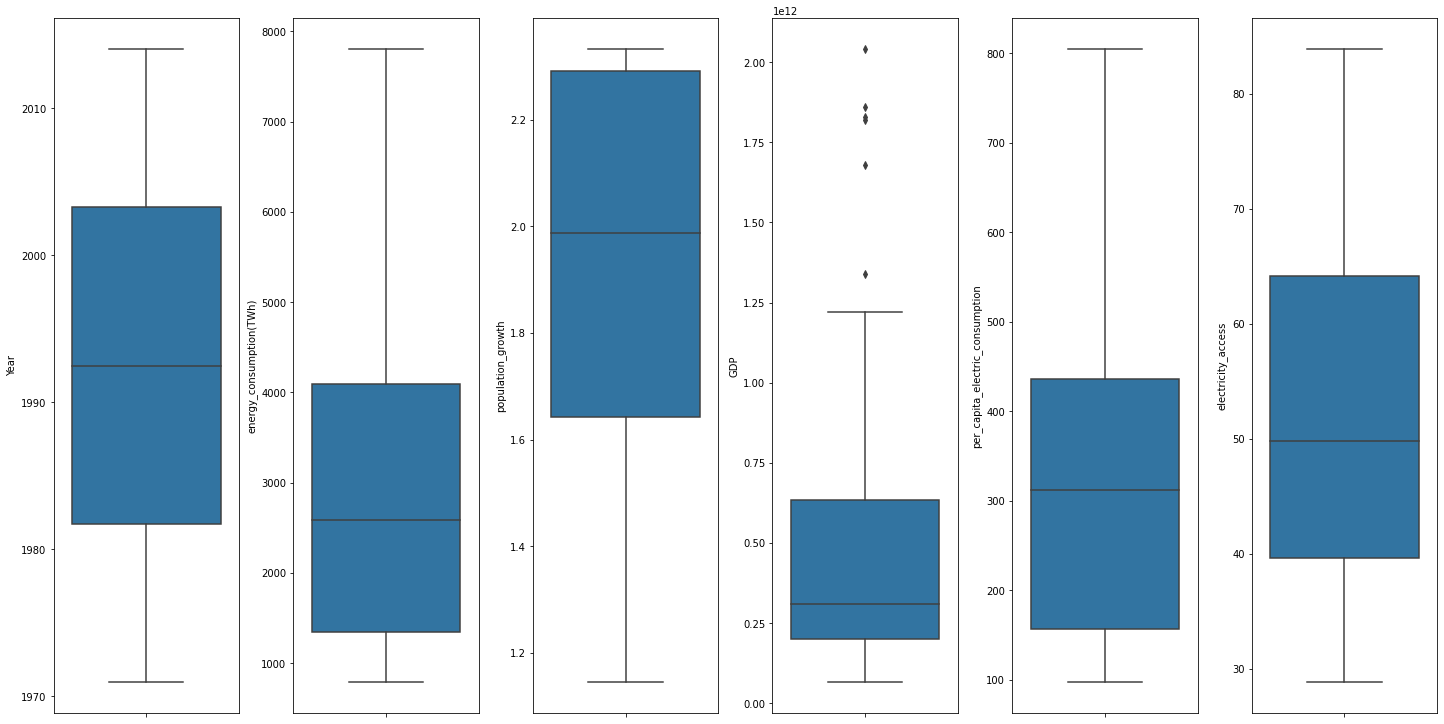

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

There are not many outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

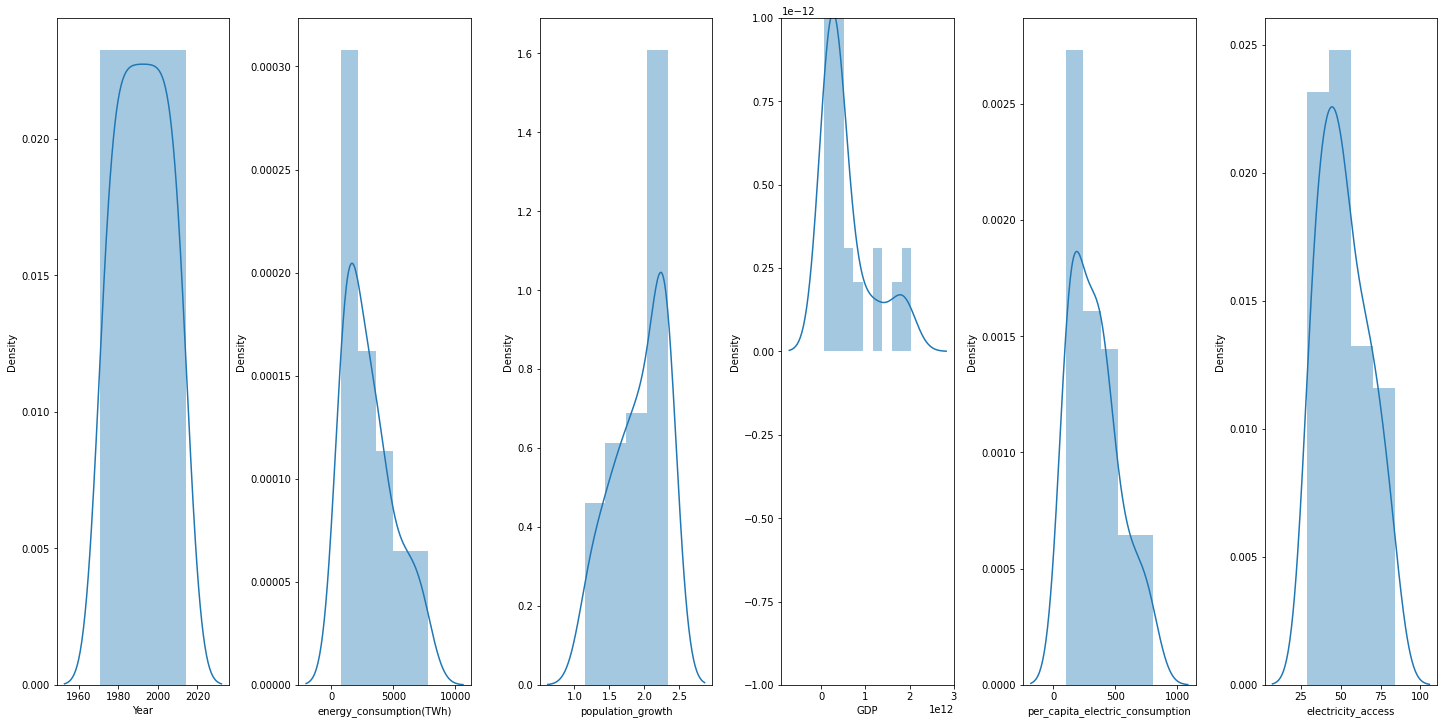

In [ ]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
#min-max normalize
cols = ['electricity_access', 'per_capita_electric_consumption', 'population_growth', 'GDP']
# train set
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

# pred set
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df_combined_pred[col])
    maximum = max(df_combined_pred[col])
    df_combined_pred[col] = (df_combined_pred[col] - minimum) / (maximum - minimum)

In [ ]:
print(df.head())
print(df_combined_pred.head())

   Year  energy_consumption(TWh)  population_growth       GDP  \
0  1971                 794.3863           0.937612  0.000000   
1  1972                 835.8586           0.974105  0.002085   
2  1973                 853.3237           0.996208  0.009208   
3  1974                 903.9876           1.000000  0.016311   
4  1975                 972.0112           0.991447  0.015777   

   per_capita_electric_consumption  electricity_access  
0                         0.000000            0.000000  
1                         0.003583            0.018191  
2                         0.004046            0.036382  
3                         0.008801            0.054573  
4                         0.023751            0.072764  
     Year  population_growth    GDP  per_capita_electric_consumption  \
0  2022.0              1.000  0.000                            0.000   
1  2023.0              0.875  0.125                            0.125   
2  2024.0              0.750  0.250                

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

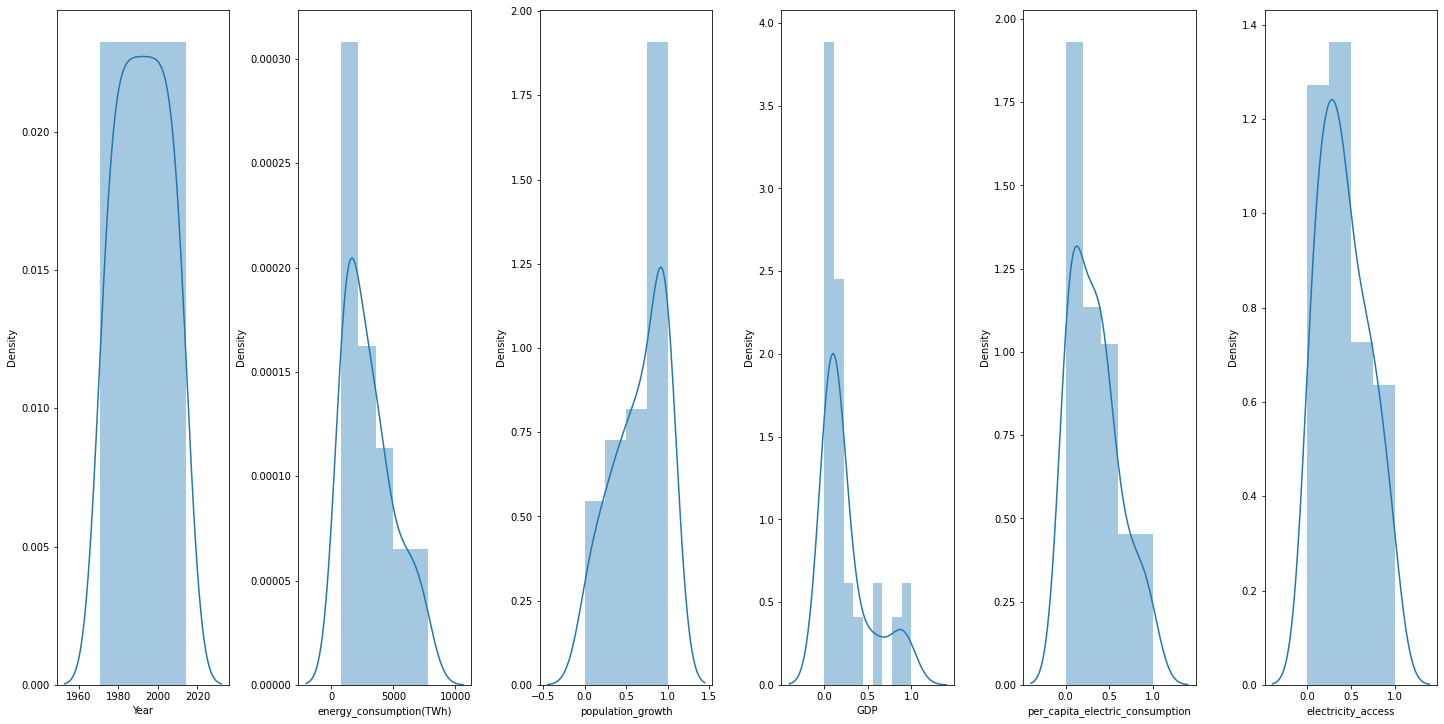

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**Co-Relation Matrix/ Heatmap**

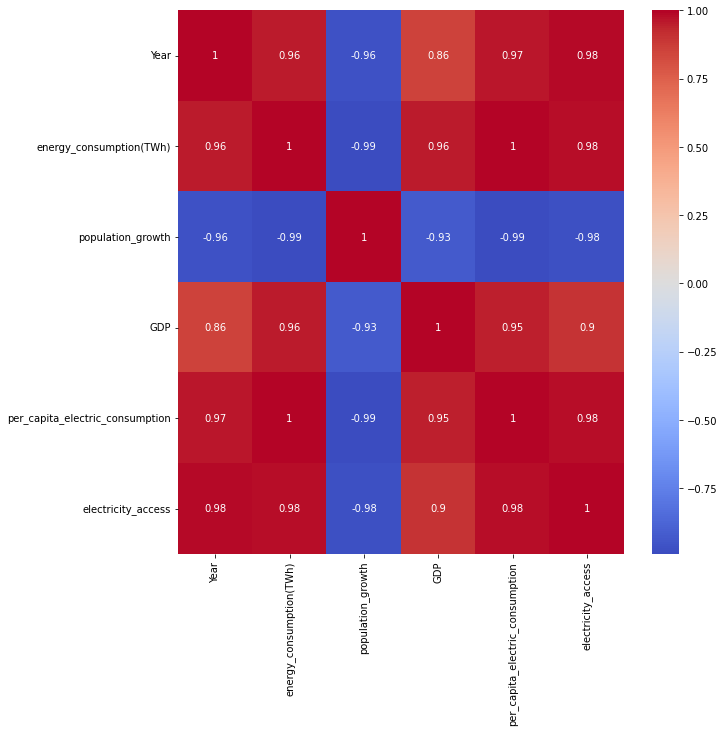

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Will drop population growth as it is negatively correlated.

In [ ]:
# train set
X = df.drop(columns=['energy_consumption(TWh)', 'population_growth'], axis=1)
y = df['energy_consumption(TWh)']
# pred set
X_pred=df_combined_pred.drop(columns=['population_growth'], axis=1)

In [ ]:
# utility function to train various models
def train(model, X, y):
    # train the model
    # x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    x_train=X.iloc[:40,:]
    y_train=y.iloc[:40]
    x_test=X.iloc[40:,:]
    y_test=y.iloc[40:]
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    print(pred)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    # print("MSE:",mean_squared_error(y_test, pred))
    # print('CV Score:', cv_score)
    print('MAE:', mean_absolute_error(y_test, pred, multioutput='uniform_average'))

In [ ]:
y_train=y.iloc[0:40]
y_train

0      794.3863
1      835.8586
2      853.3237
3      903.9876
4      972.0112
5     1019.4541
6     1078.3200
7     1120.9728
8     1182.9590
9     1218.5990
10    1349.2845
11    1336.0491
12    1405.0502
13    1500.9186
14    1584.2627
15    1695.5906
16    1802.8536
17    1962.3015
18    2143.4136
19    2300.7012
20    2427.6630
21    2552.7722
22    2616.2480
23    2757.1213
24    2963.1180
25    3081.6313
26    3252.0100
27    3449.4966
28    3549.4888
29    3728.5144
30    3743.8525
31    3865.7512
32    4004.0781
33    4347.5820
34    4603.6104
35    4849.7200
36    5263.1113
37    5570.6970
38    6003.2360
39    6269.4590
Name: energy_consumption(TWh), dtype: float64

In [ ]:
X.iloc[0:40,:]

,Year,GDP,per_capita_electric_consumption,electricity_access
0,1971,0.000000,0.000000,0.000000
1,1972,0.002085,0.003583,0.018191
2,1973,0.009208,0.004046,0.036382
3,1974,0.016311,0.008801,0.054573
4,1975,0.015777,0.023751,0.072764
5,1976,0.018072,0.037285,0.090955
6,1977,0.027196,0.040303,0.109145
7,1978,0.035307,0.053973,0.127336
8,1979,0.043418,0.053724,0.145527
9,1980,0.060147,0.062165,0.163718


**Linear Regression**

[6571.61988349 7239.92442423 7633.10619798 8079.11813907]
Model Report
MAE: 222.25856944737598


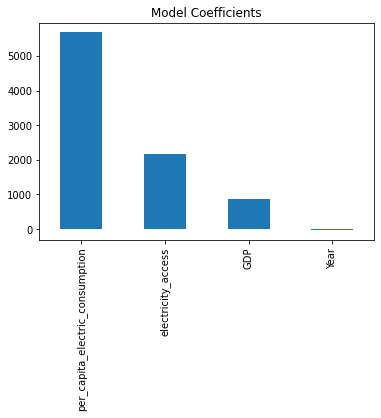

In [ ]:
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Model Coefficients')

**Decision Tree**

[6269.459 6269.459 6269.459 6269.459]
Model Report
MAE: 928.7698500000001


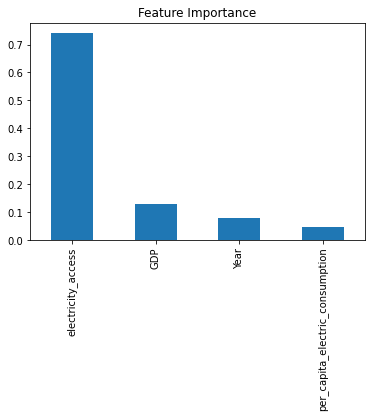

In [ ]:
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

**Random Forest**

[5639.522628 6142.404416 6142.404416 6142.404416]
Model Report
MAE: 1181.5448810000064


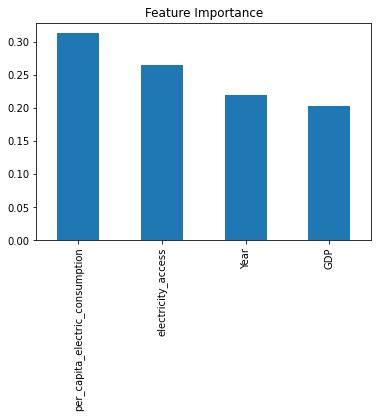

In [ ]:
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

**Extra Trees Regressor**

[5709.665068 6269.459    6269.459    6269.459   ]
Model Report
MAE: 1068.7183330000064


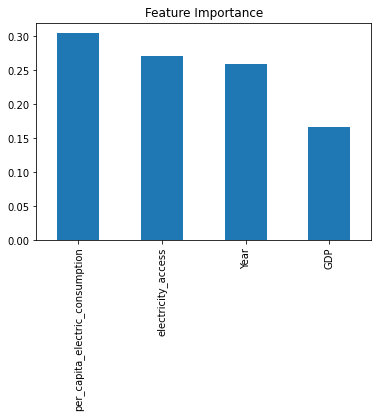

In [ ]:
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

**Xtreme Gradient Boosting**

[16:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[6242.878 6242.878 6242.878 6242.878]
[16:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Report
MAE: 955.3509203125


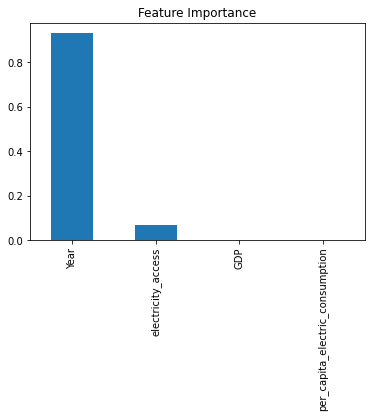

In [ ]:
model = xgb.XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

In [ ]:
df_pow_consumption3 = pd.read_csv(electric_power_consumption)
# min-max scaling 
df_pow_consumption3['Electric_consumption'] = min_max_scaling(df_pow_consumption3['Electric_consumption']) 
df_pow_consumption3.head()

,Year,Electric_consumption
0,1971,0.000000
1,1972,0.003583
2,1973,0.004046
3,1974,0.008801
4,1975,0.023751


**Conclusion: The least MAE is from Linear Regression only so we will use *linear regression* model.**

In [ ]:
X_pred.head()

,Year,GDP,per_capita_electric_consumption,electricity_access
0,2022.0,0.000,0.000,0.000
1,2023.0,0.125,0.125,0.125
2,2024.0,0.250,0.250,0.250
3,2025.0,0.375,0.375,0.375
4,2026.0,0.500,0.500,0.500


     Year  energy_consumption(TWh)
0  2022.0               481.346727
1  2023.0              1395.790586
2  2024.0              2310.234446
3  2025.0              3224.678306
4  2026.0              4139.122165
5  2027.0              5053.566025
6  2028.0              5968.009885
7  2029.0              6882.453744
8  2030.0              7796.897604


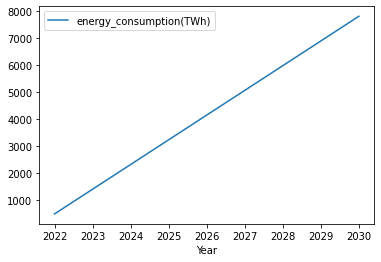

In [ ]:
X_train = df.drop(columns=['energy_consumption(TWh)', 'population_growth'], axis=1)
y_train = df['energy_consumption(TWh)']

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
model.fit(X_train, y_train)

# predictions
y_pred=model.predict(X_pred)

# making a new data frame 
year=np.array([2022,2023,2024,2025,2026,2027,2028,2029,2030])
datas = np.vstack((year, y_pred)).T

# creating a list of index names
index_values = [0,1,2,3,4,5,6,7,8]
   
# creating a list of column names
column_values = ['Year', 'energy_consumption(TWh)']
  
df_predictions = pd.DataFrame(data = datas, 
                  index = index_values, 
                  columns = column_values)
print(df_predictions.head(9))

df_predictions.plot(kind = 'line', x = 'Year', y = 'energy_consumption(TWh)')



Power Required to be generated------------------------

## Mean Squared Error

In [ ]:
print("Model Report")
print('MSE:%.5f' % mean_squared_error(y5, model5.predict(X5.values.reshape(-1, 1))))

Model Report
MSE:0.00032


## Projection for future energy requirements to be installed

NTPC's share required to be --------------
     Year  energy_to_produce(BU)
1  2023.0             348.947647
2  2024.0             577.558612
3  2025.0             806.169576
4  2026.0            1034.780541
5  2027.0            1263.391506
6  2028.0            1492.002471
7  2029.0            1720.613436
8  2030.0            1949.224401


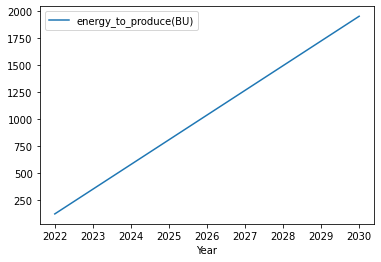

In [ ]:
# X_train = df.drop(columns=['energy_consumption(TWh)', 'population_growth'], axis=1)
# y_train = df['energy_consumption(TWh)']

# model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
# model.fit(X_train, y_train)

# predictions
y_pred=model.predict(X_pred)
y_pred=np.multiply(y_pred,0.25)

# making a new data frame 
year=np.array([2022,2023,2024,2025,2026,2027,2028,2029,2030])
datas = np.vstack((year, y_pred)).T

# creating a list of index names
index_values = [0,1,2,3,4,5,6,7,8]
   
# creating a list of column names
column_values = ['Year', 'energy_to_produce(BU)']
  
df2 = pd.DataFrame(data = datas, 
                  index = index_values, 
                  columns = column_values)
print("NTPC's share required to be --------------")
print(df2.tail(8))

df2.plot(kind = 'line', x = 'Year', y = 'energy_to_produce(BU)')



Units to produce more in future-----------
     Year  energy_to_produce(BU)
1  2023.0                     49
2  2024.0                    278
3  2025.0                    506
4  2026.0                    735
5  2027.0                    963
6  2028.0                   1192
7  2029.0                   1421
8  2030.0                   1649
Plot representing additional increase in NTPC's production capacity----------------


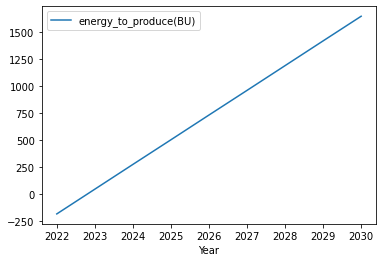

In [ ]:
df2['energy_to_produce(BU)']=df2['energy_to_produce(BU)'].apply(lambda x: round(x-300))
print("Units to produce more in future-----------")
print(df2.tail(8))
print("Plot representing additional increase in NTPC's production capacity----------------")
df2.plot(kind = 'line', x = 'Year', y = 'energy_to_produce(BU)')

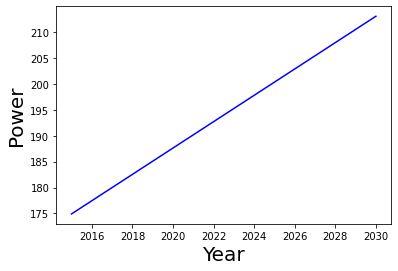

In [ ]:
X5_pred=np.array([2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030])
pred5=model5.predict(X5_pred.reshape(-1, 1))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Power', fontsize=20)
plt.plot(X5_pred, pred5, color='blue')

# Conclusion

India is a developing country with 2nd largest population in the world and with the 5th largest GDP(currently 2022) , has huge demand of power for industrialization and development of the country. Hence NTPC should strive to provide as much production of power possible for the development of our mother land, India. 

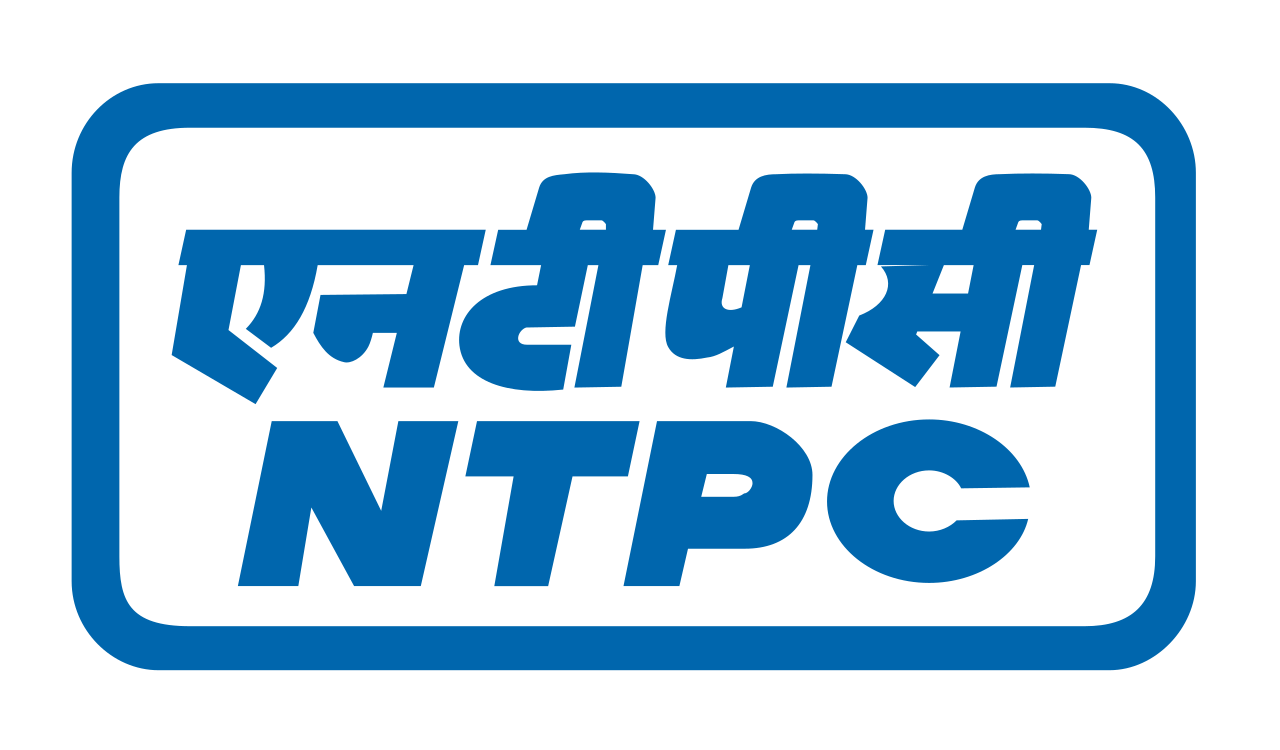